# New York Payroll Data Analysis

In this project, we look at data that captures details of salary expenditure of New York government agencies. The data has 17 columns that contains information about 3923290 employees including the agency, first and last names of the employee, working borough, salary information, etc. More details about the dataset is available here:
https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e

We start by downloading the data into the same directory as this file. 

We can begin by importing the required python libraries.

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

The data can be imported with read_csv() in pandas.

In [21]:
data = pd.read_csv('Data.csv')
data.head(5)

/Users/kaushikudupa/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


### How many years do we have the data for?

To check the number of years for which this data is available, we can use value_count() on the first column. Subsequent result can be also be plotted.

<AxesSubplot:title={'center':'Employee count by year'}>

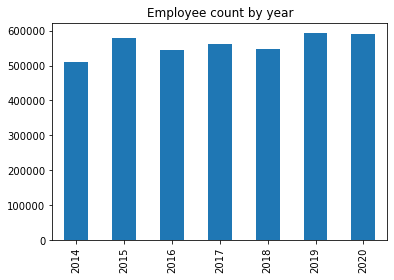

In [204]:
data['Fiscal Year'].value_counts().sort_index().plot(title = 'Employee count by year', kind = 'bar')

As we see, the dataset contains details for seven years between 2014 and 2020. The number of employees varies between 50000 and 60000 each year.

### How many agencies are there in total?

In [130]:
data['Agency Name'].str.lower().nunique()

164

A total of 164 different government agencies are included in the dataset.

### Check for NA values

Check if the data has na values by each column.

In [242]:
data.isna().sum(axis = 0).sort_values(ascending=False)

Payroll Number                1745440
Mid Init                      1596166
Work Location Borough          506226
First Name                       2073
Last Name                        2049
Title Description                  84
Agency Start Date                  63
Total Other Pay                     0
Agency Name                         0
Start Month                         0
Leave Status as of June 30          0
Base Salary                         0
Pay Basis                           0
Regular Hours                       0
Regular Gross Paid                  0
OT Hours                            0
Total OT Paid                       0
Fiscal Year                         0
dtype: int64

There are seven columns with NA values. However, they are most common in columns Payroll Number, Mid Init, and Work Location Borough. Payroll Number and Mid Init can be ignored as they are not important for the analysis. Examine if there are any patterns to the missing data in Work Location Borough.

#### NA values for Work Location Borough

#### By fiscal year:

In [78]:
data[data['Work Location Borough'].isna()]['Fiscal Year'].value_counts()

2014    506196
2017         6
2016         6
2015         6
2018         5
2019         4
2020         3
Name: Fiscal Year, dtype: int64

Most missing Work Location Boroughs are found between 2014. The years from 2015 to 2020 have very few missing values for Work Location Borough. 

In [121]:
data[data['Work Location Borough'].notna()]['Fiscal Year'].value_counts()

2019    592427
2020    590207
2015    577874
2017    562260
2018    546156
2016    544811
2014      3329
Name: Fiscal Year, dtype: int64

Only 3329 values in 2014 have valid Work Location Borough values. That is less than 0.06% of all the values. 

Let us now check if the there are any patterns in the missing boroughs with agency.

#### By agency:

In [98]:
data[data['Work Location Borough'].isna()]['Agency Name'].value_counts().sort_values(ascending=False)[0:20]

DEPT OF ED PEDAGOGICAL            100608
DEPT OF ED PER SESSION TEACHER     76334
Police Department                  55619
BOARD OF ELECTION POLL WORKERS     33241
DEPT OF ED PARA PROFESSIONALS      27566
DEPT OF ED HRLY SUPPORT STAFF      23056
FIRE DEPARTMENT                    16555
DEPT OF PARKS & RECREATION         15120
HRA/DEPT OF SOCIAL SERVICES        14765
DEPARTMENT OF EDUCATION ADMIN      13905
DEPT OF ED PER DIEM TEACHERS       13689
NYC HOUSING AUTHORITY              13627
DEPARTMENT OF SANITATION           13509
DEPARTMENT OF CORRECTION           11135
ADMIN FOR CHILDREN'S SVCS           6627
DEPT OF HEALTH/MENTAL HYGIENE       6398
DEPT OF ENVIRONMENT PROTECTION      6392
DEPARTMENT OF TRANSPORTATION        5213
COMMUNITY COLLEGE (MANHATTAN)       4622
COMMUNITY COLLEGE (KINGSBORO)       4344
Name: Agency Name, dtype: int64

DEPT OF ED PEDAGOGICAL, DEPT OF ED PER SESSION TEACHER, and the Police Department are the top three agencies with missing borough values. The above list shows the top 20 agencies.

The missing values by department is not as unequally distributed as that for years. In the latter, the missing values are dominated by single year, where as a lot of the departments have missing boroughs.

### Both names missing

Some entries have both first name and the last name of the employees missing. Investigate for patterns in this data and check if there are any systemic gaps that can be discovered.

#### By fiscal year:

<AxesSubplot:title={'center':'Both names missing by year'}, ylabel='Fiscal Year'>

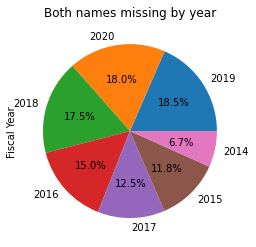

In [201]:
data[data['First Name'].isna() & data['Last Name'].isna()]['Fiscal Year'].value_counts().plot(title = 'Both names missing by year', kind = 'pie',autopct='%1.1f%%')

The values are spread across years. The general trend seems to be that the number of entries with both names missing increases every year. 

#### By agency:

<AxesSubplot:title={'center':'Both names missing by agency'}, ylabel='Agency Name'>

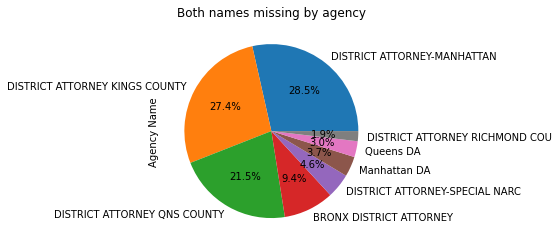

In [198]:
data[data['First Name'].isna() & data['Last Name'].isna()]['Agency Name'].value_counts().plot(title = 'Both names missing by agency', kind = 'pie',autopct='%1.1f%%')

Only seven departments have both names missing. District Attorney Kings County, Qns County, and Manhattan make up more than 75% of the entries with entries with both names missing.

### Pay basis:

Check the breakdown of payment basis for the employees. 

<AxesSubplot:title={'center':'Employee pay basis'}, ylabel='Pay Basis'>

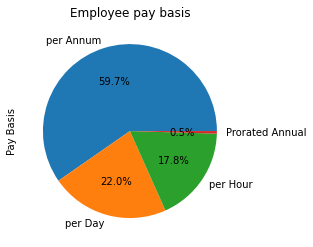

In [197]:
data['Pay Basis'].value_counts().plot(title='Employee pay basis', kind='pie',autopct='%1.1f%%')

Per annum payment has the highest share of the pie with close to 60%,  followed by daily and hourly payment with 22% and 17.8%.

### Hiring patterns across the year

In order to inspect the hiring patterns, we need to convert the given Agency Start Date into respective months. We can add a separate column containing the months.

First, extract the month from the date. Replace the na values with 0 and convert to int data type.

In [192]:
data['Start Month'] = data['Agency Start Date'].str[:2]
data['Start Month'] = data['Start Month'].fillna(0)
data['Start Month'] = data['Start Month'].astype(int)

Map the month number to the month name using the calendar.

In [193]:
d = dict(enumerate(calendar.month_abbr))
data['Start Month'] = data['Start Month'].map(d)
data.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Start Month
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,Aug
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,Sep
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,Feb
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,Sep
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,Apr


<AxesSubplot:title={'center':'Hiring By Month'}>

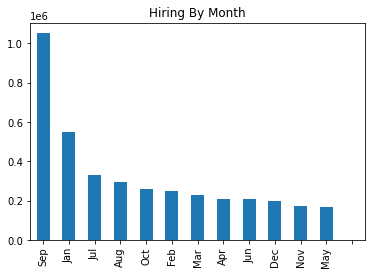

In [209]:
data['Start Month'].value_counts().sort_values(ascending=False).plot(title='Hiring By Month',kind='bar')

September sees the highest hiring, followed by the January and July. May has the least hiring with November as the penultimate month on this list.

### Employment by boroughs

Check which borough has the highest number of employment through government agencies. Keep in mind to remove the NA values for boroughs before the analysis. Also correct for duplication of boroughs by converting to lower case.

In [225]:
data[data['Work Location Borough'].notna()]['Work Location Borough'].str.lower().value_counts().sort_values(ascending=False)

manhattan        2396601
queens            380355
brooklyn          323565
bronx             178816
other              83688
richmond           46268
westchester         3417
ulster              1953
sullivan             822
delaware             551
nassau               245
putnam               243
schoharie            175
dutchess             140
albany                95
greene                61
washington dc         47
orange                22
Name: Work Location Borough, dtype: int64

Manhattan dominates the government agency employment in New York.  This is followed by Queens, Brooklyn, and Bronx. Orange has the least opportunities with only 22, followed by DC with 47.

It is also important to note that there are people with mulitple entries - one for each year. This may contradict how we consider opportunities available. To clarify, employment opportunites simply means that there was an openings that may or not may not have been filled by the same person. However, this does not dilute the fact that the opportunities were there in the first place.

### Employment by agency

Examine the emoployment opportunity by agency - which government agencies have the highest opportunities?

In [244]:
data['Agency Name'].str.lower().value_counts()[0:20]

dept of ed pedagogical            758360
dept of ed per session teacher    608565
police department                 423364
dept of ed para professionals     245259
board of election poll workers    235235
dept of ed hrly support staff     164165
fire department                   128819
dept of parks & recreation        117212
department of education admin     110936
hra/dept of social services       104331
nyc housing authority              95132
department of sanitation           92755
department of correction           91843
dept of ed per diem teachers       90784
dept of health/mental hygiene      54291
admin for children's svcs          53268
dept of environment protection     48751
department of transportation       42801
community college (manhattan)      41594
community college (laguardia)      32068
Name: Agency Name, dtype: int64

The above list shows the government agencies with top 20 employment opportunities. The predominant lines of work are education, police, and election poll workers.

### Employment by title description

Inspect the employment opportunites by title description.

In [234]:
data['Title Description'].str.lower().value_counts()[0:20]

teacher- per session         594024
teacher                      435112
election worker              232159
annual ed para               191944
teacher special education    181519
police officer               180668
teacher-general ed            84260
correction officer            69696
firefighter                   62057
f/t school aide               58867
job training participant      55701
substitute ed para            51345
sanitation worker             47151
community associate           40638
school safety agent           39776
college assistant             37817
adjunct lecturer              30080
clerical associate            29682
f/t school lunch helper       29590
city seasonal aide            27562
Name: Title Description, dtype: int64

The above list shows the top 20 jobs available across agencies. Teaching jobs top the charts, followed by election workers. Other major contributors are the police officers, correction officers, and firefighters.

Interesting to see election workers as one of the main job postings. Examine how the distribution of these workers are across fiscal years.

<AxesSubplot:title={'center':'Election workers by year'}, ylabel='Fiscal Year'>

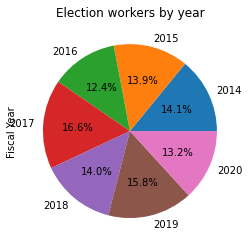

In [241]:
data[data['Title Description'].str.lower() == 'election worker']['Fiscal Year'].value_counts().sort_index().plot(title='Election workers by year',kind='pie',autopct='%1.1f%%')

2016 (12.4%) has the least number of election workers, and 2017 (16.6%) has the highest.

### Per Year Expenditure

How have the expenditure levels changed over the years? We consider the Base Salary as the primary indicator of the expenditure.

<AxesSubplot:title={'center':'Expenditure per year'}, ylabel='Base Salary'>

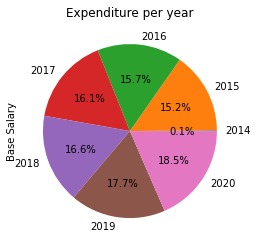

In [270]:
data[data['Work Location Borough'].notna()].groupby(['Fiscal Year'])['Base Salary'].sum().plot(title='Expenditure per year',kind='pie',autopct='%1.1f%%')

The expenditure in 2014 is extremely small (0.1%). Perhaps because the dataset contains more details about the other years compared to 2014. There is gradual increase in the expenditure every year since 2015, roughly of about 0.5 to 1%. 

It must be noted that the percentage increase in the annual expenditure is an absolute representation - meaning that the value does not indicate the per year incremental increase. Rather, it provides an overview of the increase when looked at across years.

## CONCLUSION

- We saw that dataset contained information about employment provided by givenment agencies in New York from 2014 to 2020.

- The dataset had information about 164 different government agencies.

- The NA values were dominated by columns payroll number, mid init, and work borough location.

- Almost all NA values for work borough location were found in 2014 and for agencies DEPT OF ED PEDAGOGICAL, DEPT OF ED PER SESSION TEACHER, and the Police Department.

- The number of entries with both names missing had an increasing trend each year. The District Attorney Kings County, Qns County, and Manhattan contributed to more than 75% of these entries.

- Per annum payment has the highest share of the pie with close to 60%, followed by daily and hourly payment with 22% and 17.8%.

- Hiring was highest for the month of September, and lowest for May.

- Manhattan had the highest employment opportunites, followed by Queens, Brooklyn, and Bronx.

- The predominant lines of available work are education, police, and election poll workers.

- The expenditure per year experienced an increasing trend, with an abosulte per year increase of around 1%.